In [1]:
import sys
import os

# print(os.getcwd())

# Add the parent directory to sys.path
sys.path.append("/home/jovyan/video-storage/amit_files/image_background_remove_tool")

import torch
device = "cuda" if torch.cuda.is_available else "cpu"

In [2]:
from carvekit.ml.arch.tracerb7.efficientnet import EfficientEncoderB7
from carvekit.ml.wrap.tracer_b7 import TracerUniversalB7

In [3]:
model = TracerUniversalB7()

In [4]:
model = model.to(device)

In [5]:
triplet_second_image = "/home/jovyan/video-storage/amit_files/MTP_01/Vimeo_Triplet_Folder/second_image"
img_dir = os.listdir(triplet_second_image)

In [7]:
image_dir = [os.path.join(triplet_second_image, image) for image in img_dir]

In [8]:
import time
len(image_dir)

73193

In [ ]:
start = time.time() 
output = model(image_dir)
print(time.time() - start)

In [18]:
len(output)

5019

In [28]:
from PIL import Image
import os

def save_images(image_list, folder_path,input_folder):
    # Ensure the folder exists
    os.makedirs(folder_path, exist_ok=True)

    # Loop through the image list and save each image
    for i, image in enumerate(image_list):
        name = img_dir[i].split('.')[0]
        image_path = os.path.join(folder_path,f'{name}.png')  # You can change the format and naming
        image.save(image_path)
        print(f"Saved image {i+1} at {image_path}")

folder_path = "/home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/model_output"

save_images(output, folder_path,img_dir)

Saved image 1 at /home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/foreground_Salient/ILSVRC2012_test_00040628.png
Saved image 2 at /home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/foreground_Salient/sun_avoanrnhaakppjpt.png
Saved image 3 at /home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/foreground_Salient/ILSVRC2012_test_00069229.png
Saved image 4 at /home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/foreground_Salient/ILSVRC2012_test_00047134.png
Saved image 5 at /home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/foreground_Salient/ILSVRC2012_test_00061196.png
Saved image 6 at /home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/foreground_Salient/sun_afuzusgbewygvixv.png
Saved image 7 at /home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/foreground_Salient/sun_bhgvxloiafmghxvg.png
Saved image 8 at /home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/foreground_Salient/sun_aufee

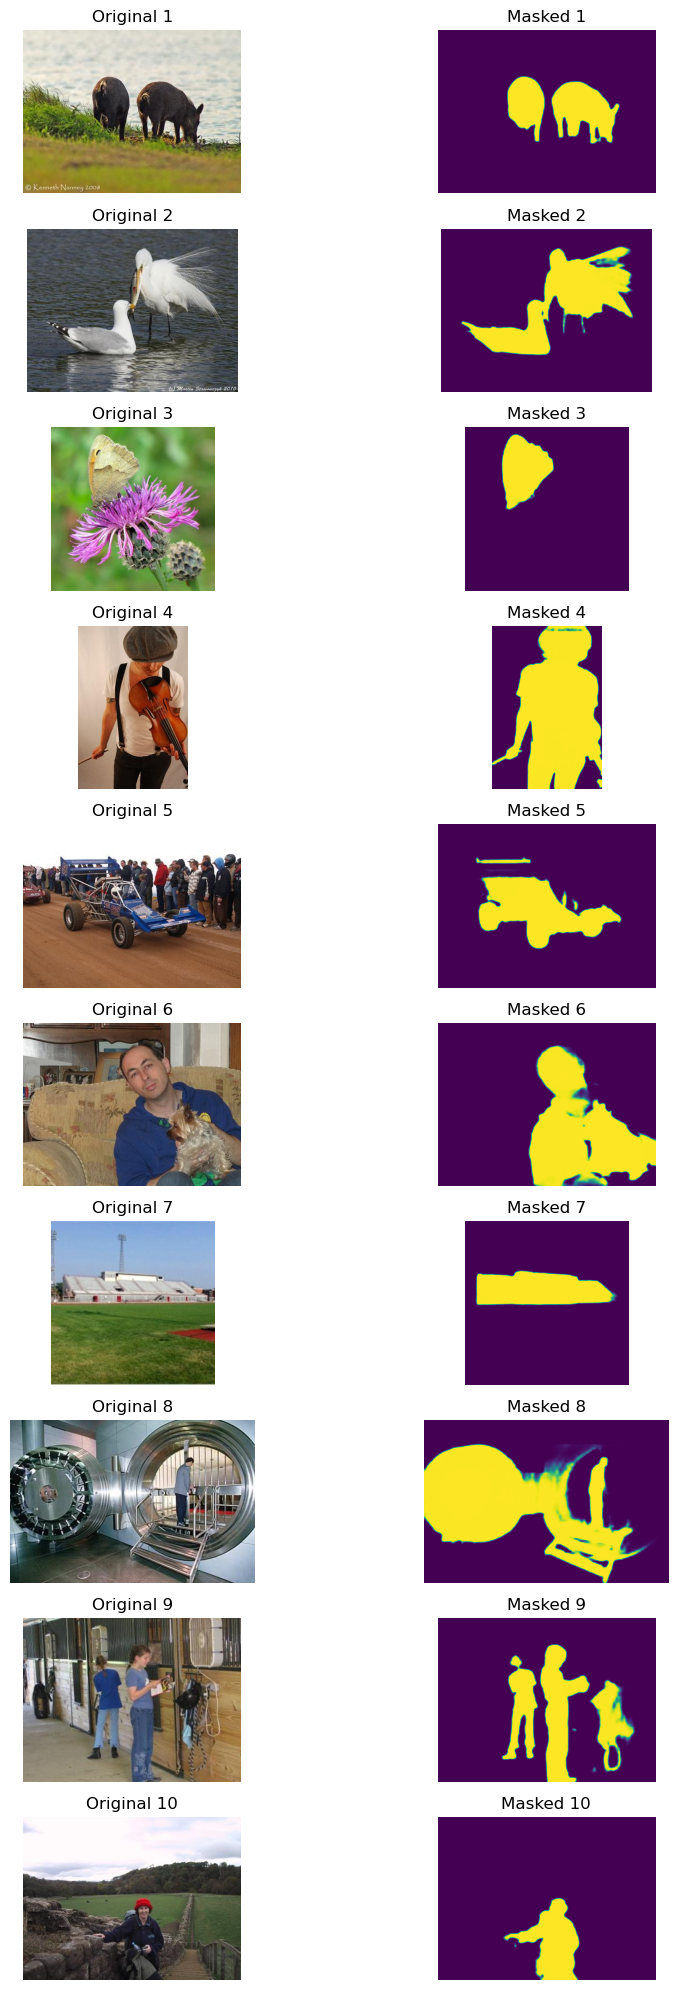

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images_grid(original_folder, masked_folder, num_images=10):
    # Get list of images from both folders
    original_images = sorted(os.listdir(original_folder)[:num_images])
    masked_images = sorted(os.listdir(masked_folder)[:num_images])
    
    # Create a figure for the grid with 10 rows and 2 columns
    fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(10, num_images * 2))
    
    for i in range(num_images):
        # Load original and masked images
        original_image_path = os.path.join(original_folder, original_images[i])
        masked_image_path = os.path.join(masked_folder, masked_images[i])
        
        original_img = Image.open(original_image_path)
        masked_img = Image.open(masked_image_path)
        
        # Display original image
        axes[i, 0].imshow(original_img)
        axes[i, 0].axis('off')  # Hide axis
        axes[i, 0].set_title(f"Original {i+1}")
        
        # Display masked image
        axes[i, 1].imshow(masked_img)
        axes[i, 1].axis('off')  # Hide axis
        axes[i, 1].set_title(f"Masked {i+1}")
    
    # Adjust spacing between images
    plt.tight_layout()
    plt.show()

# Example usage:
masked_path = "/home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/model_output"
display_images_grid(DUTS_path, masked_path, num_images=10)

In [15]:
folder = os.listdir(masked_path)

In [16]:
import numpy as np
img_path = masked_path + '/' + folder[3]
img = Image.open(img_path)
img = np.asarray(img)
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [35]:
def salient_mapping_foreground(img_path,mask_path,saved_folder):
    rgb_image = cv2.imread(img_path)  
    salient_feature_image = cv2.imread(mask_path)

    # Convert the grayscale image to binary using a threshold
    _, binary_salient_image = cv2.threshold(salient_feature_image, 128, 255, cv2.THRESH_BINARY)

    # Create a mask from the binary image (1 where salient, 0 where not)
    mask = binary_salient_image//255 
    masked_rgb_image = rgb_image*mask

    # Convert BGR to RGB for displaying using matplotlib
    masked_rgb_image = cv2.cvtColor(masked_rgb_image, cv2.COLOR_BGR2RGB)
    imidx = img_path.split("/")[-1]

    image = Image.fromarray(masked_rgb_image, 'RGB')
    image.save(saved_folder + imidx)

In [36]:
import cv2
foreground_folder = "/home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/Foreground_Sailent/"
for i in range(0,len(img_dir)):
    mask_ph = masked_path + '/' + folder[i]
    img_ph = DUTS_path + '/' + img_dir[i]

    salient_mapping_foreground(img_ph,mask_ph,background_folder)

In [34]:
def salient_mapping_background(img_path,mask_path,saved_folder):
    rgb_image = cv2.imread(img_path)  
    salient_feature_image = cv2.imread(mask_path)

    # Convert the grayscale image to binary using a threshold
    _, binary_salient_image = cv2.threshold(salient_feature_image, 128, 255, cv2.THRESH_BINARY)

    binary_salient_image = 255 - binary_salient_image
    
    # Create a mask from the binary image (1 where salient, 0 where not)
    mask = binary_salient_image//255
    masked_rgb_image = rgb_image*mask

    # Convert BGR to RGB for displaying using matplotlib
    masked_rgb_image = cv2.cvtColor(masked_rgb_image, cv2.COLOR_BGR2RGB)
    
    imidx = img_path.split("/")[-1]
    image = Image.fromarray(masked_rgb_image, 'RGB')
    
    image.save(saved_folder + imidx)

In [28]:
import cv2
background_folder = "/home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/Background_Sailent/"
for i in range(0,len(img_dir)):
    mask_ph = masked_path + '/' + folder[i]
    img_ph = DUTS_path + '/' + img_dir[i]

    salient_mapping_background(img_ph,mask_ph,background_folder)

In [29]:
print(len(os.listdir(background_folder)))

5019


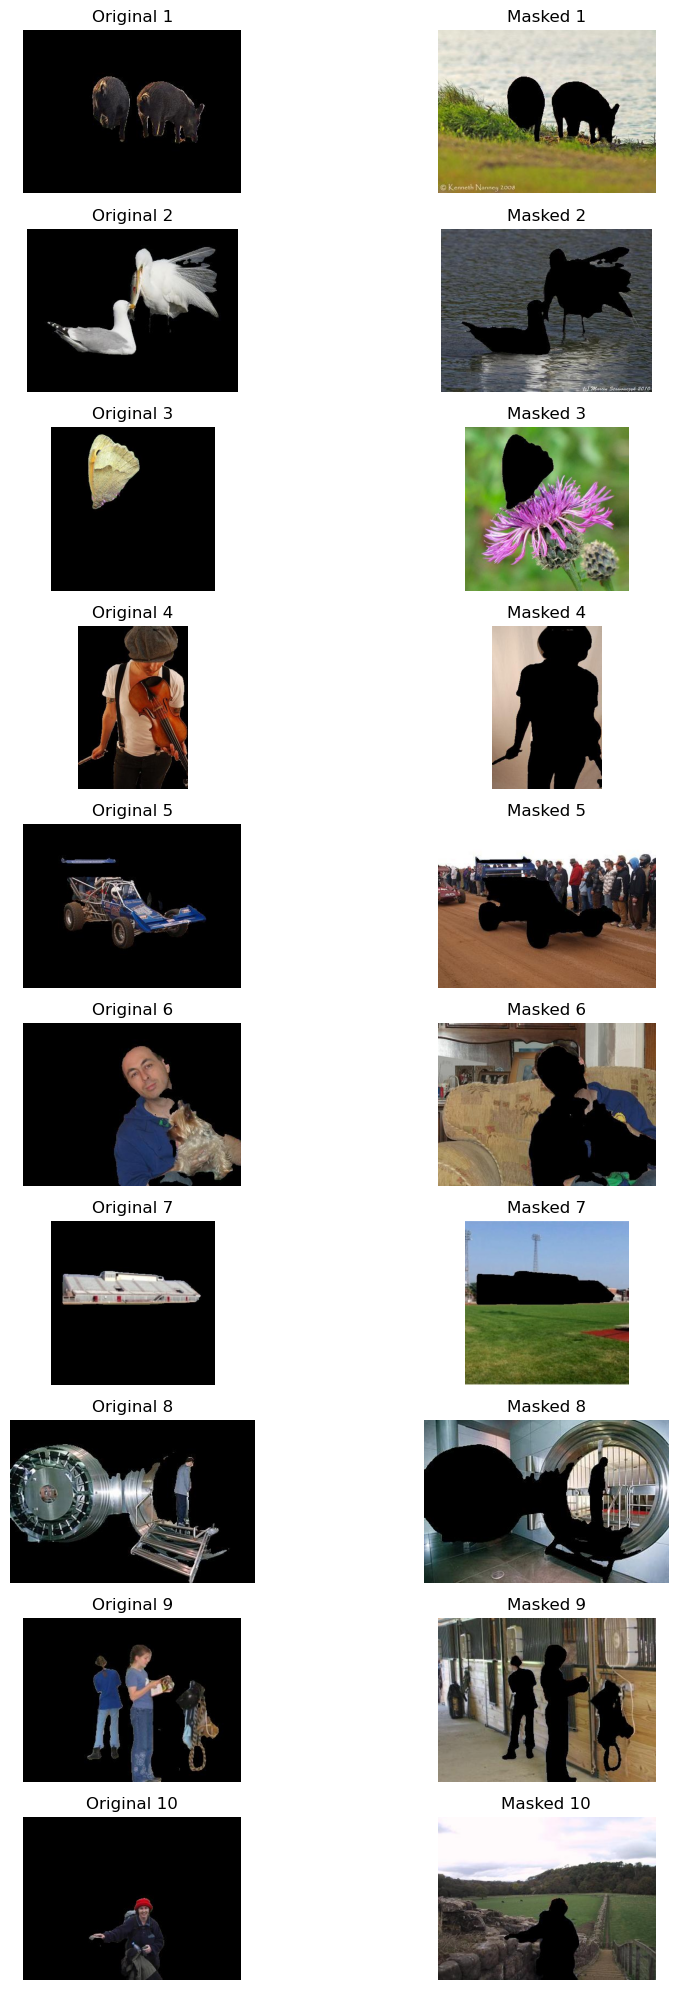

In [41]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images_grid(original_folder, masked_folder, num_images=10):
    # Get list of images from both folders
    original_images = sorted(os.listdir(original_folder)[:num_images])
    masked_images = sorted(os.listdir(masked_folder)[:num_images])
    
    # Create a figure for the grid with 10 rows and 2 columns
    fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(10, num_images * 2))
    
    for i in range(num_images):
        # Load original and masked images
        original_image_path = os.path.join(original_folder, original_images[i])
        masked_image_path = os.path.join(masked_folder, masked_images[i])
        
        original_img = Image.open(original_image_path)
        masked_img = Image.open(masked_image_path)
        
        # Display original image
        axes[i, 0].imshow(original_img)
        axes[i, 0].axis('off')  # Hide axis
        axes[i, 0].set_title(f"Original {i+1}")
        
        # Display masked image
        axes[i, 1].imshow(masked_img)
        axes[i, 1].axis('off')  # Hide axis
        axes[i, 1].set_title(f"Masked {i+1}")
    
    # Adjust spacing between images
    plt.tight_layout()
    plt.show()

# Example usage:
display_images_grid("/home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/Foreground_Sailent/", "/home/jovyan/video-storage/amit_files/MTP_01/Tracer_Salient_Map/Background_Sailent/", num_images=10)

In [43]:
import os

# Define the directory path where the images are stored
image_folder = "/home/jovyan/video-storage/amit_files/MTP_01/object/DUTS-TE-Image"

# List all files in the directory
for file_name in os.listdir(image_folder):
    # Check if the file is an image (you can add more extensions if needed)
    if file_name.endswith(('.png', '.jpg', '.jpeg')):
        # Full path to the image file
        file_path = os.path.join(image_folder, file_name)
        
        # Delete the file
        os.remove(file_path)
        print(f"Deleted {file_name}")
